In [118]:
import pickle
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

In [119]:
import sys
sys.path.append('..')
from helpers.normalization import denormalize
with open('../scenarios/test_abs_recent_params.pkl', 'rb') as f:
    scenario = pickle.load(f)
normalization_dict = scenario['normalization_dict']

In [120]:
def denormalize_profile(temp_profile):
    data = {'input_temp': temp_profile}
    denorm_data = denormalize(data, normalization_dict, verbose=False)
    return denorm_data['input_temp']

In [121]:
def denormalize_control_continuous(controls):
    data = {'input_pinj': controls}
    denorm_data = denormalize(data, normalization_dict, verbose=False)
    return denorm_data['input_temp']
    

In [128]:
filename = '/Users/virajm/src/plasma-profile-predictor/data/profile-targeting-sac/paths.pkl'

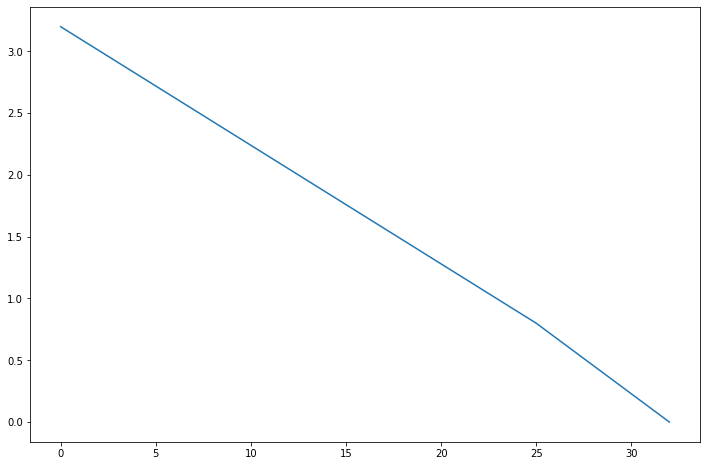

In [129]:
core_value = 3.2
pedestal_value = 0.8
edge_value = 0
pedestal_cutoff = 0.8
num_points = 33
core_values = np.linspace(core_value, pedestal_value, int(num_points * pedestal_cutoff))
edge_values = np.linspace(pedestal_value, edge_value, int(num_points * (1 - pedestal_cutoff) + 2))[1:]
target_profile = np.concatenate([core_values, edge_values])

plt.plot(target_profile)

In [130]:
with open(filename, 'rb') as f:
    paths = pickle.load(f)

In [135]:
def smooth_profile(profile, order=5, freq_cutoff=0.3):
    # low pass butterworth filter for smoothing
    sos = signal.butter(order, freq_cutoff, output='sos')
    filtered = signal.sosfilt(sos, profile[::-1])[::-1]
    output = np.concatenate([filtered[:-order], profile[-order:]])
    return output

In [136]:
ep_num = 0

Text(0.5, 0, 'timestep (each is 200ms)')

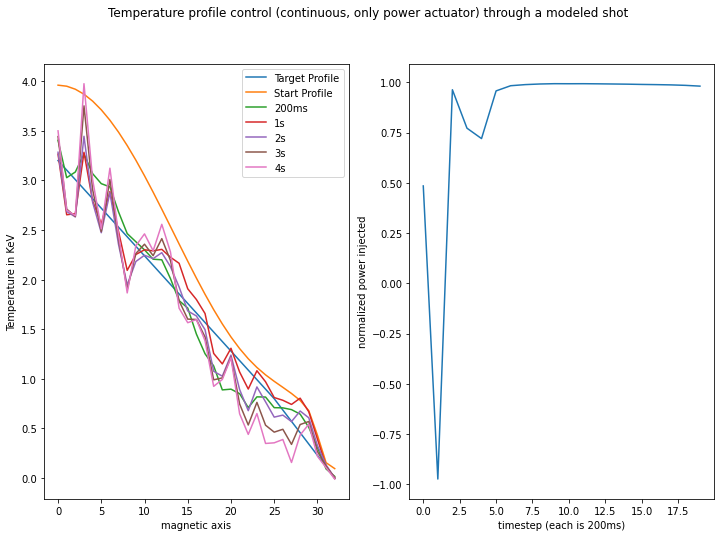

In [137]:
# temperature profiles start at index 33 and end at index 65
episode = paths[ep_num]
observations = episode['observations']
controls = episode['actions']
temp_profile = observations[:, 33:66]
fig, [ax1, ax2] = plt.subplots(1, 2)
ax1.plot(target_profile, label="Target Profile")
ax1.plot(denormalize_profile(temp_profile[0, :]), label="Start Profile")
ax1.plot(denormalize_profile(temp_profile[1, :]), label="200ms")
ax1.plot(denormalize_profile(temp_profile[5, :]), label="1s")
ax1.plot(denormalize_profile(temp_profile[10, :]), label='2s')
ax1.plot(denormalize_profile(temp_profile[15, :]), label='3s')
ax1.plot(denormalize_profile(temp_profile[19, :]), label='4s')
ax1.legend()
fig.suptitle("Temperature profile control (continuous, only power actuator) through a modeled shot")
ax1.set_xlabel('magnetic axis')
ax1.set_ylabel('Temperature in KeV')
ax2.plot(controls[:, 0], label='pinj')
ax2.set_ylabel('normalized power injected')
ax2.set_xlabel('timestep (each is 200ms)')

Text(0.5, 0, 'timestep (each is 200ms)')

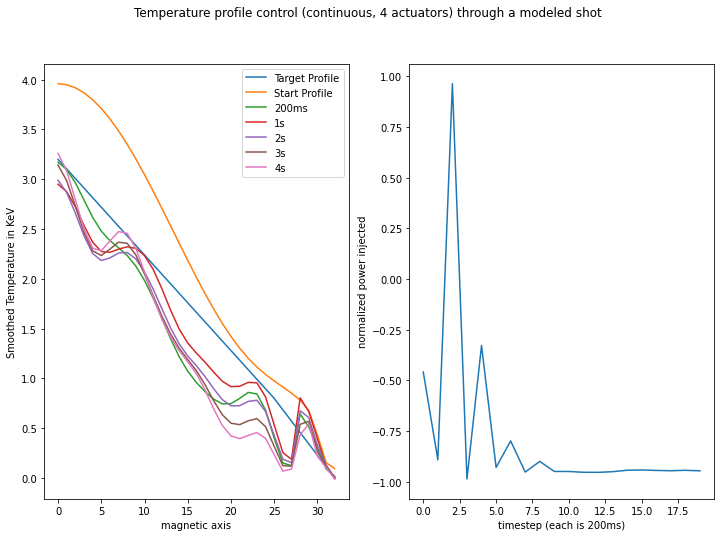

In [138]:
# temperature profiles start at index 33 and end at index 65
episode = paths[ep_num]
observations = episode['observations']
controls = episode['actions']
temp_profile = observations[:, 33:66]
fig, [ax1, ax2] = plt.subplots(1, 2)
ax1.plot(target_profile, label="Target Profile")
ax1.plot(denormalize_profile(temp_profile[0, :]), label="Start Profile")
ax1.plot(denormalize_profile(smooth_profile(temp_profile[1, :])), label="200ms")
ax1.plot(denormalize_profile(smooth_profile(temp_profile[5, :])), label="1s")
ax1.plot(denormalize_profile(smooth_profile(temp_profile[10, :])), label='2s')
ax1.plot(denormalize_profile(smooth_profile(temp_profile[15, :])), label='3s')
ax1.plot(denormalize_profile(smooth_profile(temp_profile[19, :])), label='4s')
ax1.legend()
fig.suptitle("Temperature profile control (continuous, 4 actuators) through a modeled shot")
ax1.set_xlabel('magnetic axis')
ax1.set_ylabel('Smoothed Temperature in KeV')
ax2.plot(controls[:, 1], label='pinj')
ax2.set_ylabel('normalized power injected')
ax2.set_xlabel('timestep (each is 200ms)')

Text(0.5, 0, 'Smoothed Temperature in KeV')

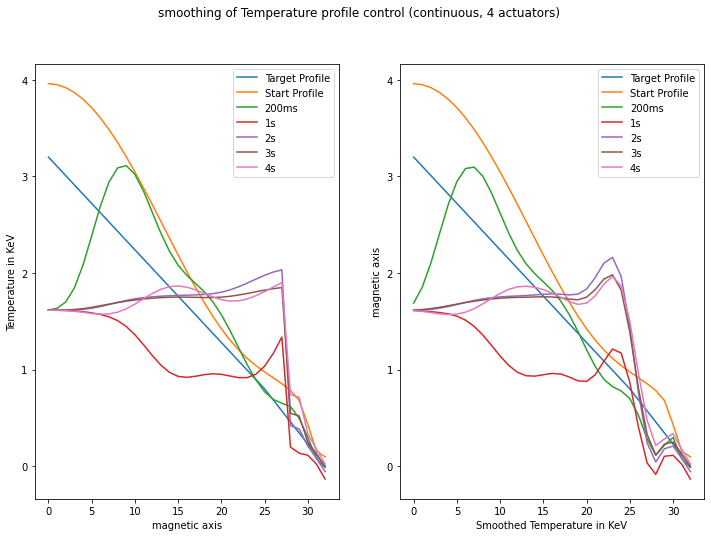

In [117]:
# temperature profiles start at index 33 and end at index 65
episode = paths[ep_num]
observations = episode['observations']
controls = episode['actions']
temp_profile = observations[:, 33:66]
fig, [ax1, ax2] = plt.subplots(1, 2)
ax1.plot(target_profile, label="Target Profile")
ax1.plot(denormalize_profile(temp_profile[0, :]), label="Start Profile")
ax1.plot(denormalize_profile(temp_profile[1, :]), label="200ms")
ax1.plot(denormalize_profile(temp_profile[5, :]), label="1s")
ax1.plot(denormalize_profile(temp_profile[10, :]), label='2s')
ax1.plot(denormalize_profile(temp_profile[15, :]), label='3s')
ax1.plot(denormalize_profile(temp_profile[19, :]), label='4s')
ax2.plot(target_profile, label="Target Profile")
ax2.plot(denormalize_profile(temp_profile[0, :]), label="Start Profile")
ax2.plot(denormalize_profile(smooth_profile(temp_profile[1, :])), label="200ms")
ax2.plot(denormalize_profile(smooth_profile(temp_profile[5, :])), label="1s")
ax2.plot(denormalize_profile(smooth_profile(temp_profile[10, :])), label='2s')
ax2.plot(denormalize_profile(smooth_profile(temp_profile[15, :])), label='3s')
ax2.plot(denormalize_profile(smooth_profile(temp_profile[19, :])), label='4s')
ax2.legend()
ax1.legend()
fig.suptitle("smoothing of Temperature profile control (continuous, 4 actuators)")
ax1.set_xlabel('magnetic axis')
ax1.set_ylabel('Temperature in KeV')
ax2.set_ylabel('magnetic axis')
ax2.set_xlabel('Smoothed Temperature in KeV')

In [55]:
controls

array([[ 9.9448168e-01, -9.8716211e-01, -9.7031480e-01,  9.8851663e-01],
       [ 9.8800468e-01, -9.4153315e-01, -9.9020332e-01,  9.9639028e-01],
       [ 9.4658148e-01, -8.9550769e-01, -9.6501446e-01,  9.7530234e-01],
       [ 3.8247836e-01, -9.4294274e-01, -6.6109204e-01,  4.1282550e-01],
       [ 4.7173110e-01, -9.3033361e-01, -6.1090195e-01,  1.9263214e-01],
       [ 5.5602425e-01, -9.7113311e-01,  5.5643007e-02,  1.9153377e-01],
       [ 3.1415051e-01, -9.7862589e-01, -7.4453640e-04, -1.2174728e-01],
       [ 9.3330383e-01, -9.9370223e-01,  6.9754052e-01, -1.7898953e-01],
       [ 9.6256727e-01, -9.9477148e-01, -3.6975411e-01, -3.6584854e-01],
       [ 9.4840521e-01, -9.9410224e-01,  3.6209443e-01,  1.7436080e-01],
       [ 9.3599492e-01, -9.9690062e-01, -3.6393666e-01, -6.3687581e-01],
       [ 9.1164649e-01, -9.9555039e-01, -2.7422443e-01, -2.4320031e-02],
       [ 9.2752188e-01, -9.9706197e-01, -1.6208516e-01, -5.2509761e-01],
       [ 8.7409633e-01, -9.9547708e-01, -4.6452925e